In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/test-file/tested.csv


In [2]:
# Load the dataset
tt = pd.read_csv('/kaggle/input/test-file/tested.csv')

## Exploratary Data Analysis

In [3]:
tt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
tt.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
tt.shape

(418, 12)

In [6]:
tt.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
tt.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Data Visualization 

In [8]:
# Visualization libraries
import plotly.express as px
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='Survived', ylabel='count'>

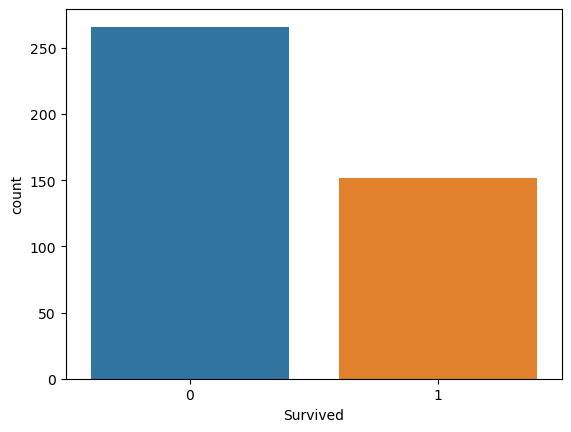

In [9]:
sns.countplot(x='Survived',data=tt)

<Axes: xlabel='Survived', ylabel='count'>

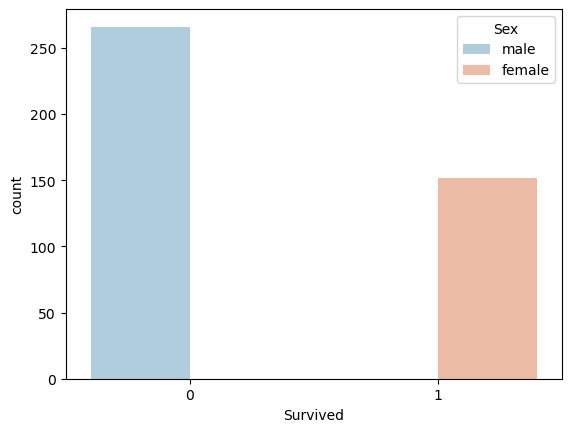

In [10]:

sns.countplot(x='Survived',hue='Sex',data=tt,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

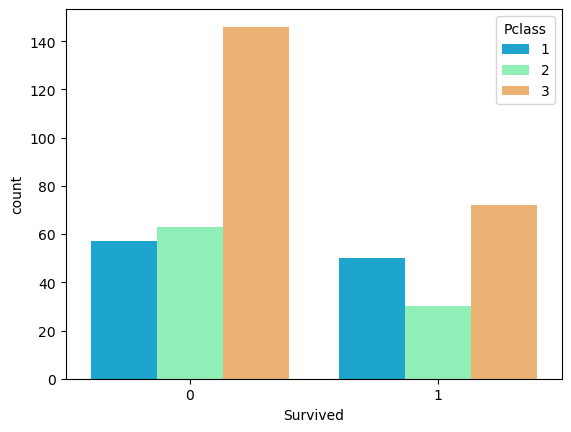

In [11]:
sns.countplot(x='Survived',hue='Pclass',data=tt,palette='rainbow')

<Axes: >

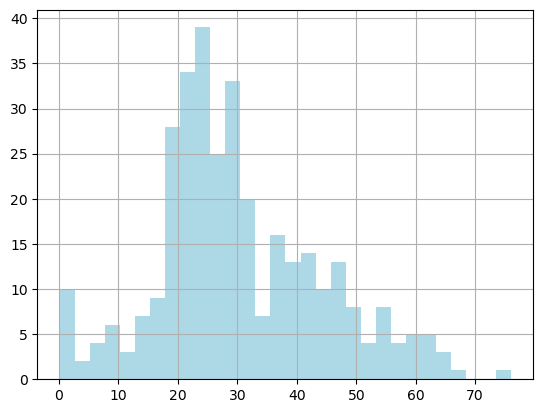

In [12]:
tt['Age'].hist(bins=30,color='lightblue')

<Axes: >

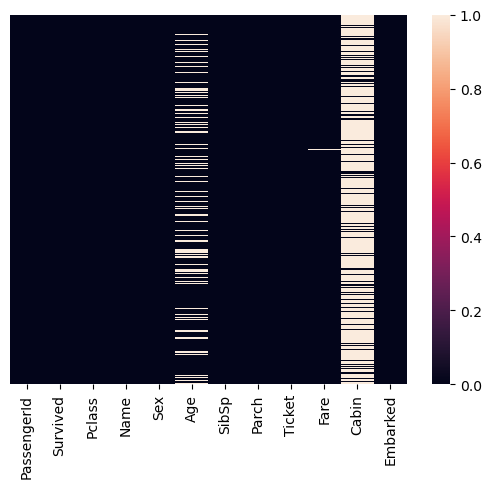

In [13]:
sns.heatmap(tt.isnull(),yticklabels=False)

**Age data is important so we can't drop it,so we will fill it on the other hand. Cabin data will be drop and fare have only one null value so we will think after Age and Cabin Columns.
There is a relationship between Pclass and age so we have to check**

In [14]:
px.box(tt,x='Pclass',y='Age',color='Pclass')

In [15]:
# in the box plot age is factor of Pclass so we fill null values with meadian
tt.loc[(tt['Pclass'] == 1) & (tt['Age'].isnull()), 'Age'] = 42
tt.loc[(tt['Pclass'] == 2) & (tt['Age'].isnull()), 'Age'] = 26
tt.loc[(tt['Pclass'] == 3) & (tt['Age'].isnull()), 'Age'] = 24

In [16]:
tt=tt.drop(columns='Cabin')

In [17]:
tt= tt.dropna()

In [18]:
tt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


<Axes: >

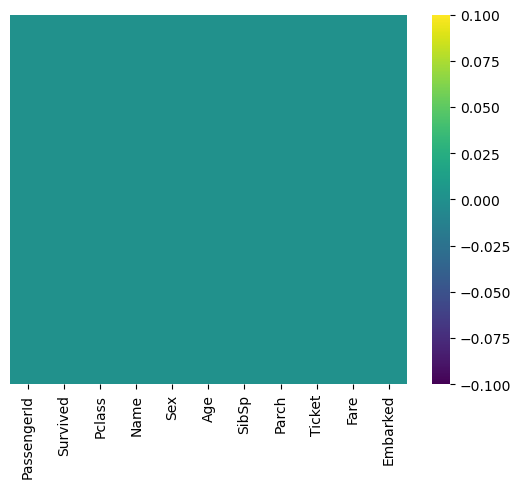

In [19]:
sns.heatmap(tt.isnull(),yticklabels=False,cmap='viridis')

### Change data type of the columns

In [20]:
tt['Age'] = tt['Age'].astype(int)
tt['Fare'] = tt['Fare'].astype(int)

In [21]:
# asign values to object using dictionary
tt['Embarked'] = tt['Embarked'].map({'Q': 0,'S':1,'C':2}).astype(int)
tt['Sex'] = tt['Sex'].map( {'female': 1,'male':0}).astype(int)

In [22]:
#drop columns for using dataset
ttn = tt.drop(['PassengerId','Name','Ticket'],axis = 1, inplace= True)

## Model Selection

### Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [24]:
tt.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,7,0
1,1,3,1,47,1,0,7,1
2,0,2,0,62,0,0,9,0
3,0,3,0,27,0,0,8,1
4,1,3,1,22,1,1,12,1


In [25]:
x= tt.drop(['Survived'],axis=1)
y= tt['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [27]:
from sklearn.metrics import accuracy_score
#prediction on test data
y_pred = clf.predict(x_test)
#calculation
acc = accuracy_score(y_test,y_pred)
print('Accuracy:', acc)

Accuracy: 1.0


### End